Step 1 : Importing Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re

In [2]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Step 2 : Dataset Loading

In [4]:
df = pd.read_csv("sentiment140.csv", encoding='latin-1', header=None)

In [5]:
df.columns = ['target', 'id', 'date', 'flag', 'user', 'text']
df.head()

,target,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


Step 3 : Data Cleaning

In [6]:
df[['target', 'text']] 
df['target'] =df['target'].replace({0: 0, 4: 1})

In [7]:
df.isnull().sum()

target    0
id        0
date      0
flag      0
user      0
text      0
dtype: int64

In [8]:
df.head()

,target,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


Step 4 : Exploratory Data Analysis(EDA)

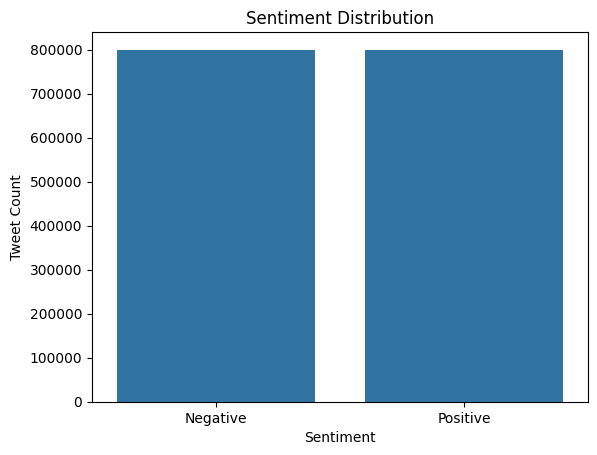

In [9]:
# Sentiment Distribution
sns.countplot(x='target', data=df)
plt.title("Sentiment Distribution")
plt.xticks([0,1], ['Negative','Positive'])
plt.xlabel('Sentiment')
plt.ylabel('Tweet Count')
plt.show()

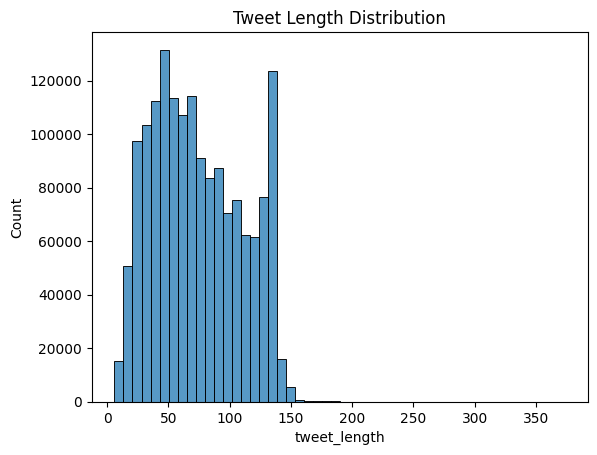

In [10]:
# Text Analysis
df['tweet_length'] = df['text'].apply(len)
sns.histplot(df['tweet_length'], bins=50)
plt.title("Tweet Length Distribution")
plt.show()

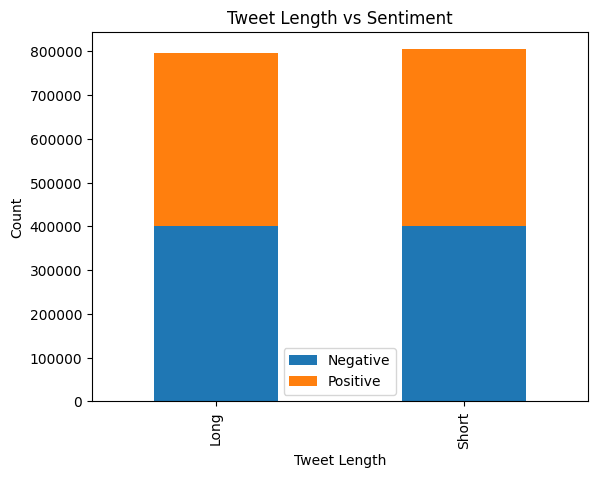

In [11]:
# Short vs Long Tweets
df['length_type'] = df['tweet_length'].apply(lambda x: 'Short' if x < 70 else 'Long')

length_sentiment = pd.crosstab(df['length_type'], df['target'])

length_sentiment.plot(kind='bar', stacked=True)
plt.title('Tweet Length vs Sentiment')
plt.xlabel('Tweet Length')
plt.ylabel('Count')
plt.legend(['Negative', 'Positive'])
plt.show()

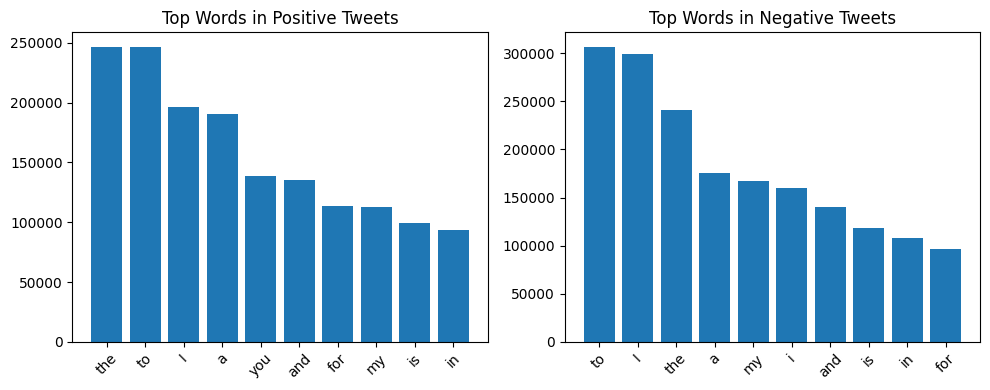

In [12]:
# Common Word Comparision
from collections import Counter

pos_words = ' '.join(df[df['target']==1]['text']).split()
neg_words = ' '.join(df[df['target']==0]['text']).split()

pos_common = Counter(pos_words).most_common(10)
neg_common = Counter(neg_words).most_common(10)

pos_df = pd.DataFrame(pos_common, columns=['Word','Count'])
neg_df = pd.DataFrame(neg_common, columns=['Word','Count'])

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Positive words
axes[0].bar(pos_df['Word'], pos_df['Count'])
axes[0].set_title('Top Words in Positive Tweets')
axes[0].tick_params(axis='x', rotation=45)

#Negative words
axes[1].bar(neg_df['Word'], neg_df['Count'])
axes[1].set_title('Top Words in Negative Tweets')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

Step 5 : Train Test Split

In [13]:
X = df['text']
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Step 6 : TF-IDF Vectorization

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

tfidf = TfidfVectorizer(stop_words='english', lowercase=True, max_features=5000)

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

Step 7 : Model Building

In [15]:
# Machine Learning (Naive Bayes)
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


Step 8 : Model Evaluation

In [16]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = model.predict(X_test_tfidf)

print("Accuracy:",
      accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.753290625

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.76      0.75    159494
           1       0.76      0.75      0.75    160506

    accuracy                           0.75    320000
   macro avg       0.75      0.75      0.75    320000
weighted avg       0.75      0.75      0.75    320000



In [18]:
#Logistic Regression Model
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_tfidf, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [20]:
#Model Evaluation(Logistic Regression Model)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred_log = log_model.predict(X_test_tfidf)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_log))


Logistic Regression Accuracy: 0.767784375

Classification Report:

              precision    recall  f1-score   support

           0       0.78      0.74      0.76    159494
           1       0.76      0.79      0.77    160506

    accuracy                           0.77    320000
   macro avg       0.77      0.77      0.77    320000
weighted avg       0.77      0.77      0.77    320000



In [21]:
print("\nConfusion Matrix:\n")
print(confusion_matrix(y_test, y_pred_log))


Confusion Matrix:

[[118355  41139]
 [ 33170 127336]]
